# Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
import re
import os
from PIL import Image

# Load Data

## Tabular Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/georgie-talukdar/Can-you-judge-a-book-by-its-cover/main/Data/merged_df.csv')

In [ ]:
def equal_frequency_discretization(column, num_bins):
    bins = pd.qcut(column, q=num_bins, duplicates='drop')
    return bins

num_bins = 5
df['Equal-Frequency'] = equal_frequency_discretization(df['total_weeks'], num_bins)
df["Equal-Frequency"] = df["Equal-Frequency"].astype(str).apply(lambda x: re.sub(r'\((\d+\.\d+), (\d+\.\d+)\]', r'\1 < x ≤ \2', x))

In [ ]:
df.head()

,Title,ID,Cover,Genres,Action and Adventure,Animals,Art,Children,Contemporary,Crime,...,Travel,War,Women,author,year,total_weeks,first_week,debut_rank,best_rank,Equal-Frequency
0,H IS FOR HOMICIDE,/works/OL14852185W,579109,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,0,1,Sue Grafton,1991,15,1991-05-05,15,2,13.0 < x ≤ 178.0
1,H IS FOR HOMICIDE,/works/OL14852185W,3108161,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,0,1,Sue Grafton,1991,15,1991-05-05,15,2,13.0 < x ≤ 178.0
2,H IS FOR HOMICIDE,/works/OL14852185W,226697,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,0,1,Sue Grafton,1991,15,1991-05-05,15,2,13.0 < x ≤ 178.0
3,I IS FOR INNOCENT,/works/OL14852192W,579110,"['Fiction', 'Women', 'Mystery and Detective']",0,0,0,0,0,0,...,0,0,1,Sue Grafton,1992,11,1992-04-26,2,2,7.0 < x ≤ 13.0
4,G IS FOR GUMSHOE,/works/OL14852180W,579057,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,0,1,Sue Grafton,1990,6,1990-05-06,8,8,4.0 < x ≤ 7.0


In [ ]:
d={'0.999 < x ≤ 2.0':'poor','2.0 < x ≤ 4.0':'mediocre','4.0 < x ≤ 7.0':'average','7.0 < x ≤ 13.0':'good','13.0 < x ≤ 178.0':'excellent'}
df['success']=df['Equal-Frequency'].map(d)

In [ ]:
df.head()

,Title,ID,Cover,Genres,Action and Adventure,Animals,Art,Children,Contemporary,Crime,...,War,Women,author,year,total_weeks,first_week,debut_rank,best_rank,Equal-Frequency,success
0,H IS FOR HOMICIDE,/works/OL14852185W,579109,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,1,Sue Grafton,1991,15,1991-05-05,15,2,13.0 < x ≤ 178.0,excellent
1,H IS FOR HOMICIDE,/works/OL14852185W,3108161,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,1,Sue Grafton,1991,15,1991-05-05,15,2,13.0 < x ≤ 178.0,excellent
2,H IS FOR HOMICIDE,/works/OL14852185W,226697,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,1,Sue Grafton,1991,15,1991-05-05,15,2,13.0 < x ≤ 178.0,excellent
3,I IS FOR INNOCENT,/works/OL14852192W,579110,"['Fiction', 'Women', 'Mystery and Detective']",0,0,0,0,0,0,...,0,1,Sue Grafton,1992,11,1992-04-26,2,2,7.0 < x ≤ 13.0,good
4,G IS FOR GUMSHOE,/works/OL14852180W,579057,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,1,Sue Grafton,1990,6,1990-05-06,8,8,4.0 < x ≤ 7.0,average


## Image Data

In [ ]:
!git clone https://github.com/georgie-talukdar/Can-you-judge-a-book-by-its-cover.git

In [ ]:
folder_path = '/content/Can-you-judge-a-book-by-its-cover/Data/All_covers'

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
    num_images = len([filename for filename in os.listdir(subfolder_path) if not os.path.isdir(os.path.join(subfolder_path, filename))])
    print(f"{subfolder}: {num_images} images")

covers_9: 535 images
covers_4: 999 images
covers_3: 999 images
covers_6: 999 images
covers_8: 999 images
covers_5: 999 images
covers_7: 998 images
covers_2: 999 images
covers_1: 999 images


In [ ]:
folder_path = '/content/Can-you-judge-a-book-by-its-cover/Data/All_covers'
covers = []  # List to store (image, label) tuples

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
    for filename in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, filename)
        if os.path.isdir(file_path):
            continue
        img = Image.open(file_path)
        label = os.path.splitext(filename)[0]  # remove the extension from the filename
        covers.append((img, label))  # Append tuple to the data list

In [ ]:
df = df[~df.duplicated(subset='Cover', keep='first')]

In [ ]:
df.head()

,Title,ID,Cover,Genres,Action and Adventure,Animals,Art,Children,Contemporary,Crime,...,War,Women,author,year,total_weeks,first_week,debut_rank,best_rank,Equal-Frequency,success
0,H IS FOR HOMICIDE,/works/OL14852185W,579109,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,1,Sue Grafton,1991,15,1991-05-05,15,2,13.0 < x ≤ 178.0,excellent
1,H IS FOR HOMICIDE,/works/OL14852185W,3108161,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,1,Sue Grafton,1991,15,1991-05-05,15,2,13.0 < x ≤ 178.0,excellent
2,H IS FOR HOMICIDE,/works/OL14852185W,226697,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,1,Sue Grafton,1991,15,1991-05-05,15,2,13.0 < x ≤ 178.0,excellent
3,I IS FOR INNOCENT,/works/OL14852192W,579110,"['Fiction', 'Women', 'Mystery and Detective']",0,0,0,0,0,0,...,0,1,Sue Grafton,1992,11,1992-04-26,2,2,7.0 < x ≤ 13.0,good
4,G IS FOR GUMSHOE,/works/OL14852180W,579057,"['Women', 'Mystery and Detective', 'Fiction']",0,0,0,0,0,0,...,0,1,Sue Grafton,1990,6,1990-05-06,8,8,4.0 < x ≤ 7.0,average


In [ ]:
# Load cover ids to check against meta data
folder_path = '/content/Can-you-judge-a-book-by-its-cover/Data/All_covers'
labels = []

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
    for filename in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, filename)
        if os.path.isdir(file_path):
            continue
        label = os.path.splitext(filename)[0]  # remove the extension from the filename
        labels.append(label)

In [ ]:
# remove rows from dataframe that do not have a corresponding cover
my_list = np.array(labels, dtype=np.int64).tolist()
df = df[df['Cover'].isin(my_list)]

In [ ]:
df.shape

(8526, 44)

In [ ]:
import pandas as pd

# Save the DataFrame as a CSV file
df.to_csv('tabular_classification.csv', index=False)

In [ ]:
import os
import pandas as pd
from PIL import Image

data_dir = '/content/Can-you-judge-a-book-by-its-cover/Data/All_covers'
image_size = (256, 256)  # Adjust the image size as per your requirements

image_files = []
labels = []

# Iterate through the folders in the data directory
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)

    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Iterate through the image files in the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Check if the file is a JPEG image
            if file_name.lower().endswith('.jpg'):
                image_files.append(file_path)
                labels.append(int(file_name.split('.')[0]))

# Create a dataframe from the image files and labels
data = {'image': image_files, 'label': labels}
df_image = pd.DataFrame(data)

# Load the images into a list
images = []
for image_file in image_files:
    image = Image.open(image_file)
    image = image.resize(image_size)  # Resize the image
    images.append(image)

# Add the image data to the dataframe
df_image['image_data'] = images

In [ ]:
df_image.head()

,image,label,image_data
0,/content/Can-you-judge-a-book-by-its-cover/Dat...,474724,<PIL.Image.Image image mode=RGB size=256x256 a...
1,/content/Can-you-judge-a-book-by-its-cover/Dat...,7376655,<PIL.Image.Image image mode=RGB size=256x256 a...
2,/content/Can-you-judge-a-book-by-its-cover/Dat...,1992109,<PIL.Image.Image image mode=RGB size=256x256 a...
3,/content/Can-you-judge-a-book-by-its-cover/Dat...,10416113,<PIL.Image.Image image mode=RGB size=256x256 a...
4,/content/Can-you-judge-a-book-by-its-cover/Dat...,861999,<PIL.Image.Image image mode=RGB size=256x256 a...


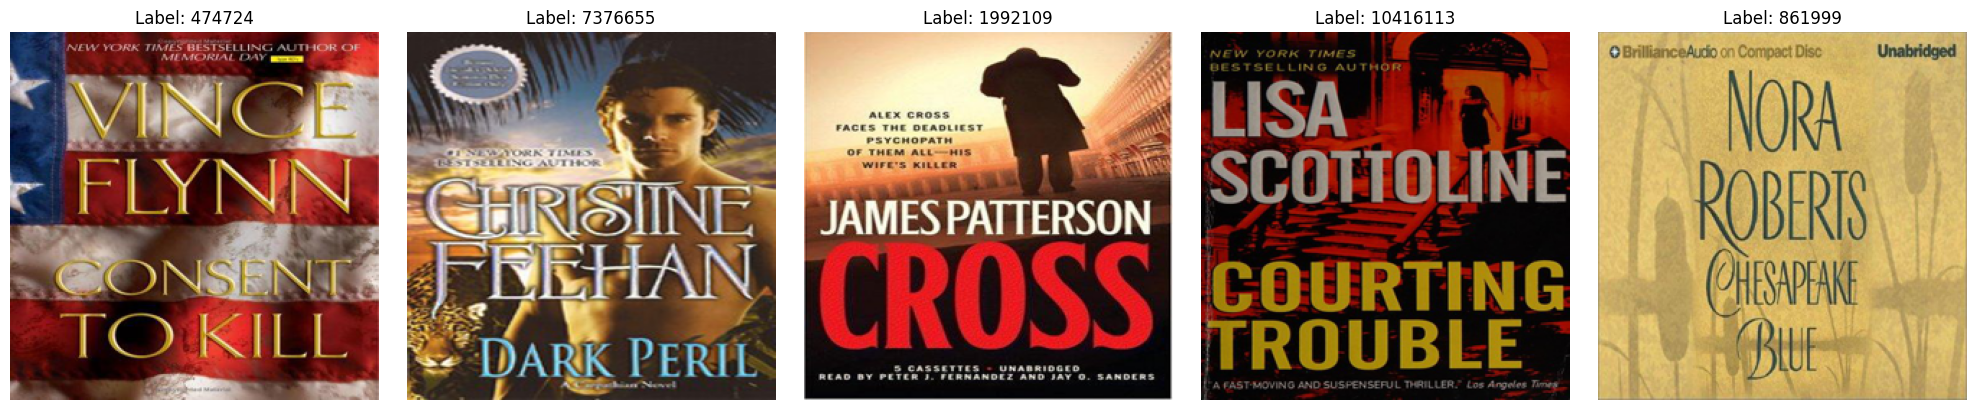

In [ ]:
import matplotlib.pyplot as plt

# Display the first 5 images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, (image, label) in enumerate(zip(df_image['image_data'][:5], df_image['label'][:5])):
    axes[i].imshow(image)
    axes[i].set_title('Label: {}'.format(label))
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
merged_df = pd.merge(df_image, df, how='left', left_on='label', right_on='Cover')

# Print the merged dataframe
print(merged_df.head())

                                               image     label  \
0  /content/Can-you-judge-a-book-by-its-cover/Dat...    474724   
1  /content/Can-you-judge-a-book-by-its-cover/Dat...   7376655   
2  /content/Can-you-judge-a-book-by-its-cover/Dat...   1992109   
3  /content/Can-you-judge-a-book-by-its-cover/Dat...  10416113   
4  /content/Can-you-judge-a-book-by-its-cover/Dat...    861999   

                                          image_data             Title  \
0  <PIL.Image.Image image mode=RGB size=256x256 a...   CONSENT TO KILL   
1  <PIL.Image.Image image mode=RGB size=256x256 a...        DARK PERIL   
2  <PIL.Image.Image image mode=RGB size=256x256 a...             CROSS   
3  <PIL.Image.Image image mode=RGB size=256x256 a...  COURTING TROUBLE   
4  <PIL.Image.Image image mode=RGB size=256x256 a...   CHESAPEAKE BLUE   

                   ID     Cover  \
0    /works/OL556751W    474724   
1  /works/OL14906399W   7376655   
2    /works/OL167148W   1992109   
3    /works/OL1184

In [ ]:
success_image = merged_df[['image_data', 'success','total_weeks','label']].copy()

success_image.head()


,image_data,success,total_weeks,label
0,<PIL.Image.Image image mode=RGB size=256x256 a...,average,6,474724
1,<PIL.Image.Image image mode=RGB size=256x256 a...,poor,2,7376655
2,<PIL.Image.Image image mode=RGB size=256x256 a...,excellent,15,1992109
3,<PIL.Image.Image image mode=RGB size=256x256 a...,mediocre,3,10416113
4,<PIL.Image.Image image mode=RGB size=256x256 a...,average,5,861999


In [ ]:
success_image.shape

(8526, 4)

In [ ]:
import os
from PIL import Image

def save_images_from_dataframe(df, save_dir):
    # Create the save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    for i, row in df.iterrows():
        image = row['image_data']
        label = row['success']
        label2 = row['label']
        filename = f"{label2}_{label}_{i}.jpg"  # Create a unique filename based on the label and index
        save_path = os.path.join(save_dir, filename)  # Combine the save directory and filename

        try:
            # Save the image as a JPG file
            image.save(save_path, "JPEG")
            print(f"Saved image {i + 1}/{len(df)} as {filename}")
        except Exception as e:
            print(f"Error saving image {i + 1}/{len(df)}: {str(e)}")

save_dir = "/content/drive/MyDrive/Covers/multimodal"
save_images_from_dataframe(success_image, save_dir)


Streaming output truncated to the last 5000 lines.
Saved image 3527/8526 as 4233205_good_3526.jpg
Saved image 3528/8526 as 1994954_mediocre_3527.jpg
Saved image 3529/8526 as 7944147_excellent_3528.jpg
Saved image 3530/8526 as 5427780_mediocre_3529.jpg
Saved image 3531/8526 as 33465_poor_3530.jpg
Saved image 3532/8526 as 390056_poor_3531.jpg
Saved image 3533/8526 as 259159_poor_3532.jpg
Saved image 3534/8526 as 7129008_good_3533.jpg
Saved image 3535/8526 as 9465974_mediocre_3534.jpg
Saved image 3536/8526 as 5338882_poor_3535.jpg
Saved image 3537/8526 as 8401306_poor_3536.jpg
Saved image 3538/8526 as 8918793_average_3537.jpg
Saved image 3539/8526 as 4212225_mediocre_3538.jpg
Saved image 3540/8526 as 13143468_mediocre_3539.jpg
Saved image 3541/8526 as 890103_good_3540.jpg
Saved image 3542/8526 as 9487147_average_3541.jpg
Saved image 3543/8526 as 10183687_poor_3542.jpg
Saved image 3544/8526 as 7071557_mediocre_3543.jpg
Saved image 3545/8526 as 8905648_average_3544.jpg
Saved image 3546/8526

In [ ]:
import os

# Set the file path to the root directory containing the images
root_dir = '/content/drive/MyDrive/Covers/multimodal'

# Initialize a counter for the number of images
image_count = 0

# Iterate over the files in the root directory
for file in os.listdir(root_dir):
    # Check if the file is an image
    if file.endswith('.jpg'):
        image_count += 1

# Print the number of images in the original root file
print("Number of images:", image_count)

Number of images: 8526


In [ ]:
import os
import zipfile

def zip_folder(folder_path, zip_filename):
    # Create a zip file object
    zipf = zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED)

    # Iterate over all the files and subdirectories in the folder
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Get the absolute path of the file
            file_path = os.path.join(root, file)

            # Add the file to the zip
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

    # Close the zip file
    zipf.close()

folder_path = "/content/drive/MyDrive/Covers/multimodal"
zip_filename = "label_images.zip"

zip_folder(folder_path, zip_filename)


In [ ]:
import os
from PIL import Image

def save_images_from_dataframe(df, save_dir):
    # Create the save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    for i, row in df.iterrows():
        image = row['image_data']
        label = row['success']
        filename = f"{label}_{i}.jpg"  # Create a unique filename based on the label and index
        save_path = os.path.join(save_dir, filename)  # Combine the save directory and filename

        try:
            # Save the image as a JPG file
            image.save(save_path, "JPEG")
            print(f"Saved image {i + 1}/{len(df)} as {filename}")
        except Exception as e:
            print(f"Error saving image {i + 1}/{len(df)}: {str(e)}")

save_dir = "/content/drive/MyDrive/Covers/classification"
save_images_from_dataframe(success_image, save_dir)


Streaming output truncated to the last 5000 lines.
Saved image 3527/8526 as poor_3526.jpg
Saved image 3528/8526 as poor_3527.jpg
Saved image 3529/8526 as mediocre_3528.jpg
Saved image 3530/8526 as average_3529.jpg
Saved image 3531/8526 as mediocre_3530.jpg
Saved image 3532/8526 as average_3531.jpg
Saved image 3533/8526 as poor_3532.jpg
Saved image 3534/8526 as poor_3533.jpg
Saved image 3535/8526 as excellent_3534.jpg
Saved image 3536/8526 as excellent_3535.jpg
Saved image 3537/8526 as mediocre_3536.jpg
Saved image 3538/8526 as poor_3537.jpg
Saved image 3539/8526 as mediocre_3538.jpg
Saved image 3540/8526 as average_3539.jpg
Saved image 3541/8526 as average_3540.jpg
Saved image 3542/8526 as mediocre_3541.jpg
Saved image 3543/8526 as mediocre_3542.jpg
Saved image 3544/8526 as poor_3543.jpg
Saved image 3545/8526 as poor_3544.jpg
Saved image 3546/8526 as poor_3545.jpg
Saved image 3547/8526 as poor_3546.jpg
Saved image 3548/8526 as mediocre_3547.jpg
Saved image 3549/8526 as poor_3548.jpg
Sa

In [ ]:
import os

# Set the file path to the root directory containing the images
root_dir = '/content/drive/MyDrive/Covers/classification'

# Initialize a counter for the number of images
image_count = 0

# Iterate over the files in the root directory
for file in os.listdir(root_dir):
    # Check if the file is an image
    if file.endswith('.jpg'):
        image_count += 1

# Print the number of images in the original root file
print("Number of images:", image_count)

Number of images: 8526


In [ ]:
import os
import zipfile

def zip_folder(folder_path, zip_filename):
    # Create a zip file object
    zipf = zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED)

    # Iterate over all the files and subdirectories in the folder
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Get the absolute path of the file
            file_path = os.path.join(root, file)

            # Add the file to the zip
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

    # Close the zip file
    zipf.close()

# Example usage
folder_path = "/content/drive/MyDrive/Covers/classification"
zip_filename = "classification_images.zip"

zip_folder(folder_path, zip_filename)


In [ ]:
import os
from PIL import Image

def save_images_from_dataframe(df, save_dir):
    # Create the save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    for i, row in df.iterrows():
        image = row['image_data']
        label = row['total_weeks']
        filename = f"{label}_{i}.jpg"  # Create a unique filename based on the label and index
        save_path = os.path.join(save_dir, filename)  # Combine the save directory and filename

        try:
            # Save the image as a JPG file
            image.save(save_path, "JPEG")
            print(f"Saved image {i + 1}/{len(df)} as {filename}")
        except Exception as e:
            print(f"Error saving image {i + 1}/{len(df)}: {str(e)}")

save_dir = "/content/drive/MyDrive/Covers/regression"
save_images_from_dataframe(success_image, save_dir)


Streaming output truncated to the last 5000 lines.
Saved image 3527/8526 as 1_3526.jpg
Saved image 3528/8526 as 2_3527.jpg
Saved image 3529/8526 as 3_3528.jpg
Saved image 3530/8526 as 7_3529.jpg
Saved image 3531/8526 as 3_3530.jpg
Saved image 3532/8526 as 5_3531.jpg
Saved image 3533/8526 as 2_3532.jpg
Saved image 3534/8526 as 2_3533.jpg
Saved image 3535/8526 as 32_3534.jpg
Saved image 3536/8526 as 14_3535.jpg
Saved image 3537/8526 as 3_3536.jpg
Saved image 3538/8526 as 2_3537.jpg
Saved image 3539/8526 as 4_3538.jpg
Saved image 3540/8526 as 6_3539.jpg
Saved image 3541/8526 as 5_3540.jpg
Saved image 3542/8526 as 4_3541.jpg
Saved image 3543/8526 as 3_3542.jpg
Saved image 3544/8526 as 1_3543.jpg
Saved image 3545/8526 as 2_3544.jpg
Saved image 3546/8526 as 2_3545.jpg
Saved image 3547/8526 as 2_3546.jpg
Saved image 3548/8526 as 3_3547.jpg
Saved image 3549/8526 as 1_3548.jpg
Saved image 3550/8526 as 2_3549.jpg
Saved image 3551/8526 as 2_3550.jpg
Saved image 3552/8526 as 4_3551.jpg
Saved image

In [ ]:
import os

# Set the file path to the root directory containing the images
root_dir = '/content/drive/MyDrive/Covers/regression'

# Initialize a counter for the number of images
image_count = 0

# Iterate over the files in the root directory
for file in os.listdir(root_dir):
    # Check if the file is an image
    if file.endswith('.jpg'):
        image_count += 1

# Print the number of images in the original root file
print("Number of images:", image_count)

Number of images: 8526


In [ ]:
import os
import zipfile

def zip_folder(folder_path, zip_filename):
    # Create a zip file object
    zipf = zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED)

    # Iterate over all the files and subdirectories in the folder
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Get the absolute path of the file
            file_path = os.path.join(root, file)

            # Add the file to the zip
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

    # Close the zip file
    zipf.close()

# Example usage
folder_path = "/content/drive/MyDrive/Covers/regression"
zip_filename = "regression_images.zip"

zip_folder(folder_path, zip_filename)


In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Set the file path to the directory containing the images
image_dir = '/content/gdrive/MyDrive/Covers/classification_images'

# Initialize empty lists to store images and labels
images = []
labels = []

# Iterate over the files in the directory
for file in os.listdir(image_dir):
    # Check if the file is an image
    if file.endswith('.jpg'):
        # Extract the label from the filename
        label = file.split('_')[0]

        # Load the image
        image_path = os.path.join(image_dir, file)
        image = load_img(image_path, target_size=(224, 224))  # Set target image size
        image_array = img_to_array(image)
        images.append(image_array)
        labels.append(label)

# Convert the image and label lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the image data
images = images / 255.0

# Create a TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices((images, labels))


In [ ]:
dataset_size = len(dataset)
print("Dataset size:", dataset_size)

Dataset size: 8526
